# FAKE NEWS DETECTION

In [1]:
#libraries to import!
import pandas as pd
import numpy as np
import regex as re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
#Reading the data from csv!
df_fnews=pd.read_csv("C:/Users/yuvak/OneDrive/Desktop/code clause/news/news.csv")

In [3]:
df_fnews.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df_fnews.rename(columns={'Unnamed: 0':'Id'}, inplace=True)

In [5]:
df_fnews.head()

,Id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df_fnews.describe()

,Id
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
df_fnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
df_fnews.shape

(6335, 4)

In [9]:
df_fnews.dtypes

Id        int64
title    object
text     object
label    object
dtype: object

In [10]:
# Drop the unnecessary columns
df_fnews = df_fnews.drop(['Id', 'title'], axis=1)

# Drop the missing values
df_fnews = df_fnews.dropna()

In [11]:
df_fnews.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [12]:
#Data cleaning!
df_fnews.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
6330,False,False
6331,False,False
6332,False,False
6333,False,False


In [13]:
df_fnews.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
df_fnews.notnull()

,text,label
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
6330,True,True
6331,True,True
6332,True,True
6333,True,True


In [15]:
# Remove urls!
# Define regular expression patterns
url_pattern = r"http\S+|www\S+"
mention_pattern = r"@\w+"
hashtag_pattern = r"#\w+"

# Apply regular expression substitutions to the Text column
df_fnews["text"] = df_fnews["text"].str.replace(url_pattern, "", regex=True)
df_fnews["text"] = df_fnews["text"].str.replace(mention_pattern, "", regex=True)
df_fnews["text"] = df_fnews["text"].str.replace(hashtag_pattern, "", regex=True)

In [16]:
df_fnews.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King () November 9, 2016 The lesson f...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [17]:
# Define regular expression pattern to match all punctuation
punct_pattern = r"[{}]".format(string.punctuation)

# Apply regular expression substitution to the Text column
df_fnews["text"] = df_fnews["text"].str.replace(punct_pattern, "", regex=True)

In [18]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_fnews['text'], df_fnews['label'], test_size=0.2, random_state=42)

In [19]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [20]:
# Fit and transform the training set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [21]:
# Transform the test set
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
# Initialize the Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)

In [23]:
# Fit the model on the training set
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [24]:
# predict the labels of the test set
y_pred = pac.predict(tfidf_test)

In [25]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [26]:
# Calculate the accuracy, precision, recall, and f1 score of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Accuracy: 0.9423835832675612
Precision: 0.9423838960000454
Recall: 0.9423835832675612
F1 Score: 0.9423831525295278


In [27]:
# Generate some random data
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

In [28]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

Slope: 2.03
Intercept: 0.01
R-squared: 0.83


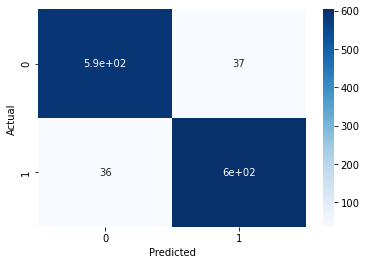

In [29]:
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Assume df_fnews is your DataFrame containing the news articles
total_count = len(df_fnews)
real_count = len(df_fnews[df_fnews['label'] == 'REAL'])
fake_count = len(df_fnews[df_fnews['label'] == 'FAKE'])

percent_real = (real_count / total_count) * 100
percent_fake = (fake_count / total_count) * 100

# Create a new DataFrame with the percentages
percentages = pd.DataFrame({
    'Label': ['REAL', 'FAKE'],
    'Percentage': [percent_real, percent_fake]
})

# Display the percentages
print(percentages)

  Label  Percentage
0  REAL   50.055249
1  FAKE   49.944751


In [31]:
# Split data into input features and target variable
X = df_fnews['text']
y = df_fnews['label']

# Convert text data to numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Instantiate Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9194948697711128
